## XYZ Company Product Analysis

Brief:​ XYZ has been soft-launching four products over the past year. A decision now needs to be made about which product to push to a full launch.

All four products are mobile products for the IOS and Android platforms.

Instructions:​ You will have been supplied with two CSV files. Using the data tool/language of your choice, analyze the data for each product, and make a recommendation on which product you think is the best candidate for a full launch. Please submit your code/workings along with your analysis and final recommendation.

Details of The Files

data1_new.csv​ is a lookup table, with one row per user. Columns as follows:
id:​ Unique user ID.
c_type:​ Type of the user.
product:​ Name of the soft launch product.
date:​ The date the user installed in YYYY-MM-DD format.
cost:​ The cost to acquire the item via paid adverts on Facebook, Youtube, etc.
data2_new.csv​ is product/user/day grain data from four mini-products. The table has one row per

product per user per date, where the user used the product that day. Columns are as follows:
id:​ unique user ID.
group1_revenue:​ how much in-app purchase revenue the user-generated that day in USD.
group2_revenue:​ how much video ad revenue the user-generated that day in USD.
product:​ name of the soft launch product.
transaction_date:​ activity date in YYYY-MM-DD format.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from pylab import rcParams
rcParams['figure.figsize'] = 22,10

In [3]:
df1 = pd.read_csv('data1_new.csv')
df2 = pd.read_csv('data2_new.csv')
# print(df1.sample(10))
# print(df2.sample(10))

In [4]:
df1

,id,c_type,product,date,cost
0,lvuhzmoc7oe2tx4j,group1,product4,2020-02-01,1.789952
1,5feydxuoc6x2y5qj,group1,product4,2020-02-01,1.944925
2,dlfj8bm8o1mjn1ee,group1,product4,2020-02-01,2.102154
3,4k8b1wt1emx4e0fc,group2,product4,2020-02-01,0.000000
4,53uekb9p71u3p3h2,group1,product4,2020-02-01,2.274721
...,...,...,...,...,...
573754,hfdzh9cj7d6jeahi,group1,product3,2020-12-28,0.275054
573755,dv46x6lbghepkdac,group2,product3,2020-12-28,0.000000
573756,dg4swflvq5tyy6le,group1,product3,2020-12-28,0.337841
573757,t4o3v49fayyfas1f,group2,product3,2020-12-28,0.000000


In [5]:
df2

,id,group1_revenue,group2_revenue,product,transaction_date
0,5afg4b871bvs42ai,0.0,0.000000,product1,2020-05-17
1,3js4iaq9fuooizrl,0.0,0.000000,product1,2020-04-03
2,ws45348zv2hm76l4,0.0,0.000000,product1,2020-04-05
3,tmrvq606rif8xiqx,0.0,0.000000,product1,2020-04-09
4,y2hxfwpjj1912wif,0.0,0.000000,product1,2020-04-06
...,...,...,...,...,...
2279210,w88r92oqfwdkc5l7,0.0,0.309168,product4,2020-04-30
2279211,jgkyb8bqwij2l701,0.0,0.046620,product4,2020-04-30
2279212,9n5i0tu6398i5glm,0.0,0.000000,product4,2020-04-30
2279213,tewy0mb0nsgeuod1,0.0,0.007897,product4,2020-04-30


In [6]:
df2[df2['id']=='9n5i0tu6398i5glm']

,id,group1_revenue,group2_revenue,product,transaction_date
1788974,9n5i0tu6398i5glm,0.0,0.018807,product4,2020-05-06
1790538,9n5i0tu6398i5glm,0.0,0.087820,product4,2020-05-06
1912609,9n5i0tu6398i5glm,0.0,0.264112,product4,2020-04-03
1912756,9n5i0tu6398i5glm,0.0,0.356614,product4,2020-04-12
1928828,9n5i0tu6398i5glm,0.0,0.000000,product4,2020-04-28
1929331,9n5i0tu6398i5glm,0.0,0.000000,product4,2020-04-03
1930498,9n5i0tu6398i5glm,0.0,0.000000,product4,2020-04-07
1931185,9n5i0tu6398i5glm,0.0,0.000000,product4,2020-04-23
1933155,9n5i0tu6398i5glm,0.0,0.000000,product4,2020-04-28
1934538,9n5i0tu6398i5glm,0.0,0.000000,product4,2020-04-23


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573759 entries, 0 to 573758
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       573759 non-null  object 
 1   c_type   573759 non-null  object 
 2   product  573759 non-null  object 
 3   date     573759 non-null  object 
 4   cost     573759 non-null  float64
dtypes: float64(1), object(4)
memory usage: 21.9+ MB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279215 entries, 0 to 2279214
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   id                object 
 1   group1_revenue    float64
 2   group2_revenue    float64
 3   product           object 
 4   transaction_date  object 
dtypes: float64(2), object(3)
memory usage: 86.9+ MB


In [9]:
df1.isnull().sum()

id         0
c_type     0
product    0
date       0
cost       0
dtype: int64

In [10]:
df2.isnull().sum()

id                  0
group1_revenue      0
group2_revenue      0
product             0
transaction_date    0
dtype: int64

** No missing values.

In [11]:
for i in df1.columns:
    print(i)
    print(df1[i].value_counts(dropna=False))
    print("*"*33)
#User ID value counts are all 1 because that df contains "installation" of product.

id
l2357pl9vmhywvq1    1
mme8tnyvabteq2r3    1
0w2syjb2txempnbq    1
3knbv0w3zxcqazme    1
1wfwspcsz7j2if4z    1
                   ..
yaq4agwljoel9ov3    1
tcmdg5aji68zbh9j    1
ojuhzt9zyh8w6q7q    1
l0zovn7hek8f1q6h    1
boi6xdtgoww0luww    1
Name: id, Length: 573759, dtype: int64
*********************************
c_type
group1    311359
group2    262400
Name: c_type, dtype: int64
*********************************
product
product2    328075
product4    100650
product1     78675
product3     66359
Name: product, dtype: int64
*********************************
date
2020-08-04    5771
2020-08-12    5737
2020-08-08    5731
2020-08-22    5708
2020-08-28    5657
              ... 
2020-02-15     351
2020-11-21     347
2020-02-12     343
2020-11-20     340
2020-11-13     331
Name: date, Length: 267, dtype: int64
*********************************
cost
0.000000    297321
3.926086         1
0.176410         1
1.565700         1
0.395804         1
             ...  
0.965631         1
2.515000  

In [12]:
for i in df2.columns:
    print(i)
    print(df2[i].value_counts(dropna=False))
    print("*"*33)
#User ID values are more than 1 because they make transactions in different days

id
stq6ygy9fqpxqxmf    91
67uu3p4h5osaeyj7    91
cdypk57fkkgl7w6t    91
rprhalfqpc8yrnh3    91
wnn7fuyb2xe39f7l    91
                    ..
yq12dt0rvhrvcf50     1
aevz4hyzq28phja9     1
vfg672mh38stf3tk     1
agmsgqo0o0fihpcr     1
65ncb4t1wje2vj4s     1
Name: id, Length: 573759, dtype: int64
*********************************
group1_revenue
0.000000      2257440
6.138533            1
56.336154           1
21.017237           1
1.079350            1
               ...   
250.254549          1
54.284842           1
1.102790            1
3.461650            1
2.446616            1
Name: group1_revenue, Length: 21776, dtype: int64
*********************************
group2_revenue
0.000000    2019762
0.013749          1
0.126221          1
0.051038          1
0.034541          1
             ...   
0.019746          1
0.064366          1
0.023637          1
0.021686          1
0.303608          1
Name: group2_revenue, Length: 259454, dtype: int64
*********************************
product
pr

In [13]:
#Lets convert objects to numeric or datetime
df1['c_group_type'] = df1['c_type'].apply(lambda x : 1 if x== 'group1' else 2)
df1['product_type'] = df1['product'].apply(lambda x : int(x[-1]))
df1['date']= pd.to_datetime(df1['date'])

In [14]:
df1 = df1.drop('c_type', axis = 1)
df1 = df1.drop('product', axis = 1)
df1.head()

,id,date,cost,c_group_type,product_type
0,lvuhzmoc7oe2tx4j,2020-02-01,1.789952,1,4
1,5feydxuoc6x2y5qj,2020-02-01,1.944925,1,4
2,dlfj8bm8o1mjn1ee,2020-02-01,2.102154,1,4
3,4k8b1wt1emx4e0fc,2020-02-01,0.000000,2,4
4,53uekb9p71u3p3h2,2020-02-01,2.274721,1,4


In [15]:
df1['user_no'] = df1.index  + 1
df1

,id,date,cost,c_group_type,product_type,user_no
0,lvuhzmoc7oe2tx4j,2020-02-01,1.789952,1,4,1
1,5feydxuoc6x2y5qj,2020-02-01,1.944925,1,4,2
2,dlfj8bm8o1mjn1ee,2020-02-01,2.102154,1,4,3
3,4k8b1wt1emx4e0fc,2020-02-01,0.000000,2,4,4
4,53uekb9p71u3p3h2,2020-02-01,2.274721,1,4,5
...,...,...,...,...,...,...
573754,hfdzh9cj7d6jeahi,2020-12-28,0.275054,1,3,573755
573755,dv46x6lbghepkdac,2020-12-28,0.000000,2,3,573756
573756,dg4swflvq5tyy6le,2020-12-28,0.337841,1,3,573757
573757,t4o3v49fayyfas1f,2020-12-28,0.000000,2,3,573758


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573759 entries, 0 to 573758
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            573759 non-null  object        
 1   date          573759 non-null  datetime64[ns]
 2   cost          573759 non-null  float64       
 3   c_group_type  573759 non-null  int64         
 4   product_type  573759 non-null  int64         
 5   user_no       573759 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 26.3+ MB


In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
cost,573759.0,0.814830,2.570275,0.0,0.0,0.0,0.505289,98.283126
c_group_type,573759.0,1.457335,0.498177,1.0,1.0,1.0,2.000000,2.000000
product_type,573759.0,2.329379,0.919771,1.0,2.0,2.0,3.000000,4.000000
user_no,573759.0,286880.000000,165630.100887,1.0,143440.5,286880.0,430319.500000,573759.000000


In [18]:
#df2 conversions
df2['product_type'] = df2['product'].apply(lambda x : int(x[-1]))
df2['transaction_date']= pd.to_datetime(df2['transaction_date'])

In [19]:
df2 = df2.drop('product', axis = 1)
df2.head()

,id,group1_revenue,group2_revenue,transaction_date,product_type
0,5afg4b871bvs42ai,0.0,0.0,2020-05-17,1
1,3js4iaq9fuooizrl,0.0,0.0,2020-04-03,1
2,ws45348zv2hm76l4,0.0,0.0,2020-04-05,1
3,tmrvq606rif8xiqx,0.0,0.0,2020-04-09,1
4,y2hxfwpjj1912wif,0.0,0.0,2020-04-06,1


In [20]:
df2 = df2.sort_values(by='transaction_date',ignore_index=True)
df2.head()

,id,group1_revenue,group2_revenue,transaction_date,product_type
0,3hpenrzb1t9bgtnx,0.0,0.0,2020-02-01,4
1,3a606dujm9xtc9bz,0.0,0.0,2020-02-01,4
2,pz4pwaqzyhzmr5dg,0.0,0.0,2020-02-01,4
3,n2kpnacoxccb9qr5,0.0,0.0,2020-02-01,4
4,fjv76jfu84au9xuk,0.0,0.0,2020-02-01,4


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279215 entries, 0 to 2279214
Data columns (total 5 columns):
 #   Column            Dtype         
---  ------            -----         
 0   id                object        
 1   group1_revenue    float64       
 2   group2_revenue    float64       
 3   transaction_date  datetime64[ns]
 4   product_type      int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 86.9+ MB


In [22]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
group1_revenue,2279215.0,0.125767,3.187887,0.0,0.0,0.0,0.0,1670.690466
group2_revenue,2279215.0,0.011789,0.093012,0.0,0.0,0.0,0.0,47.552192
product_type,2279215.0,2.415073,1.032941,1.0,2.0,2.0,3.0,4.000000


--

<AxesSubplot:>

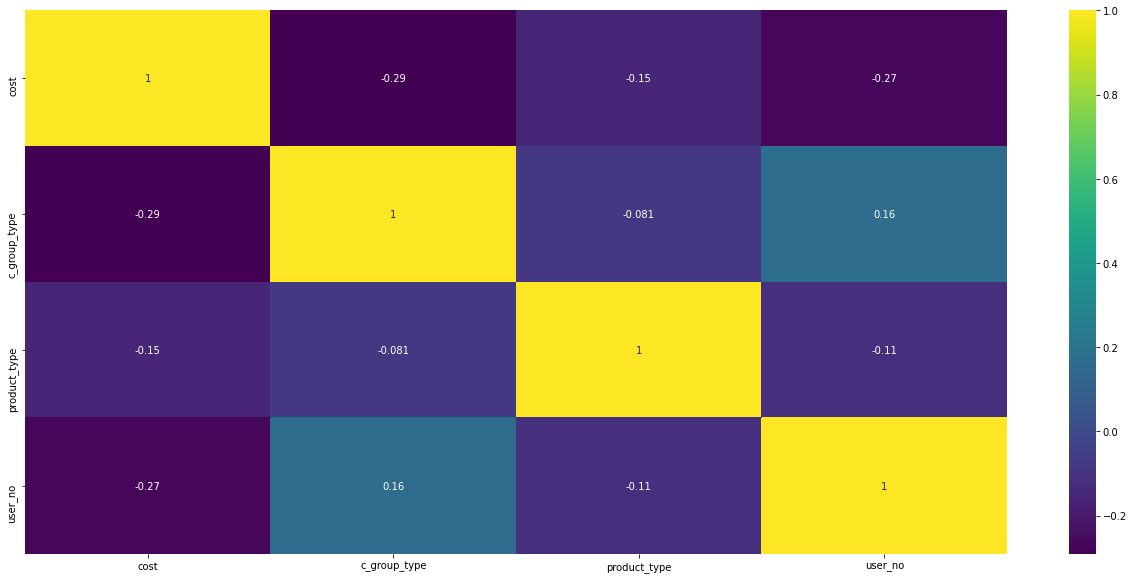

In [23]:
sns.heatmap(df1.corr(), cmap="viridis", annot=True)

<AxesSubplot:>

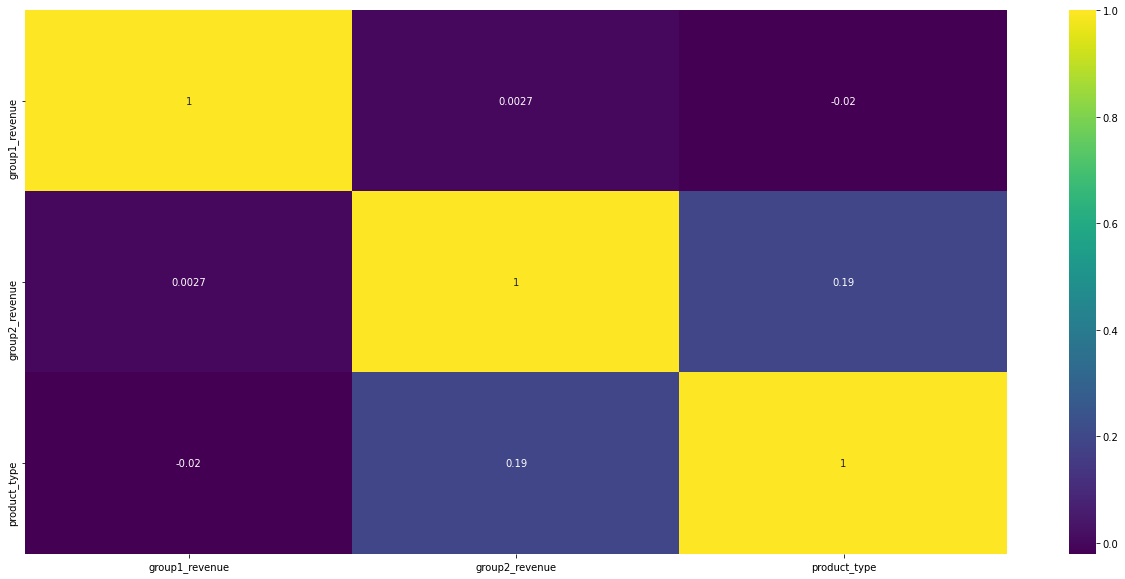

In [24]:
sns.heatmap(df2.corr(), cmap="viridis", annot=True)

In [25]:
df2.sample(5)

,id,group1_revenue,group2_revenue,transaction_date,product_type
1943052,mt68wrnjjj0ct9lc,0.0,0.0,2020-10-07,2
2006048,9zvudg5h5718r7j1,0.0,0.0,2020-10-14,2
1655182,ojz87gcn455uhkxk,0.0,0.0,2020-09-17,3
1056072,wnzbiatqkp3m2d8m,0.0,0.0,2020-08-08,2
2081081,bf09c9449282mzuf,0.0,0.0,2020-10-22,3


In [31]:
df1.sample(5)

,id,date,cost,c_group_type,product_type,user_no
436102,escqlskdvaupihr3,2020-09-18,0.299906,1,2,436103
58786,m268npsapa01jowi,2020-03-29,0.000000,2,1,58787
517355,5fxkz0y1j5kags7z,2020-10-12,0.000000,2,3,517356
335276,19a1hgrzdwaeejuu,2020-08-28,0.000000,1,2,335277
236885,aqsl7ab91xw3qqk7,2020-08-11,0.514623,1,2,236886


<AxesSubplot:xlabel='date', ylabel='user_no'>

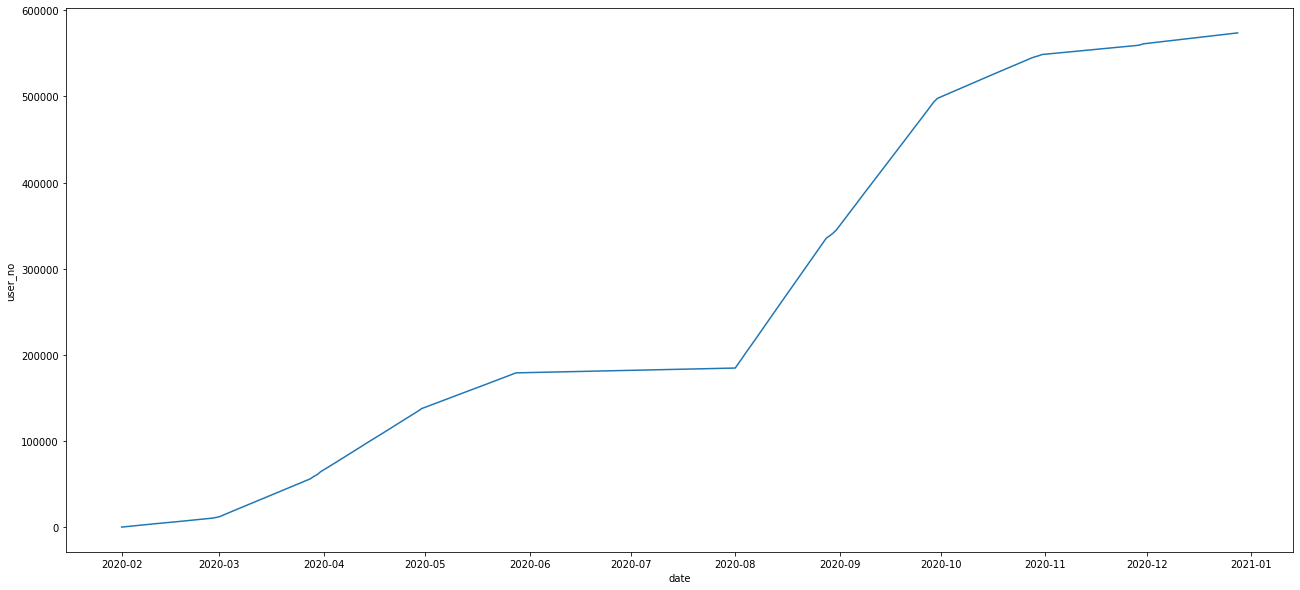

In [37]:
sns.lineplot(x=df1.groupby('date').max().index, y='user_no', data=df1.groupby('date').max())

In [38]:
dx = df1.groupby(['date','product_type']).max()
dx.reset_index(inplace=True)
dx

,date,product_type,id,cost,c_group_type,user_no
0,2020-02-01,4,zwbslqhi307xi5jp,5.942134,2,373
1,2020-02-02,4,zxqda69wt511w57c,8.644409,2,774
2,2020-02-03,4,zyz29678pon8bo4w,4.102904,2,1139
3,2020-02-04,4,zymmvzr33yg74lqe,8.642820,2,1536
4,2020-02-05,4,zzvnx06im6poau20,8.617569,2,1914
...,...,...,...,...,...,...
412,2020-12-24,3,zykmpi0vfgcmz4ia,0.389340,2,571927
413,2020-12-25,3,zyxzappales5kci7,0.389286,2,572359
414,2020-12-26,3,zumpmauih7lt2q0d,0.389393,2,572817
415,2020-12-27,3,zzo3ndp0mklfc73s,0.389332,2,573294


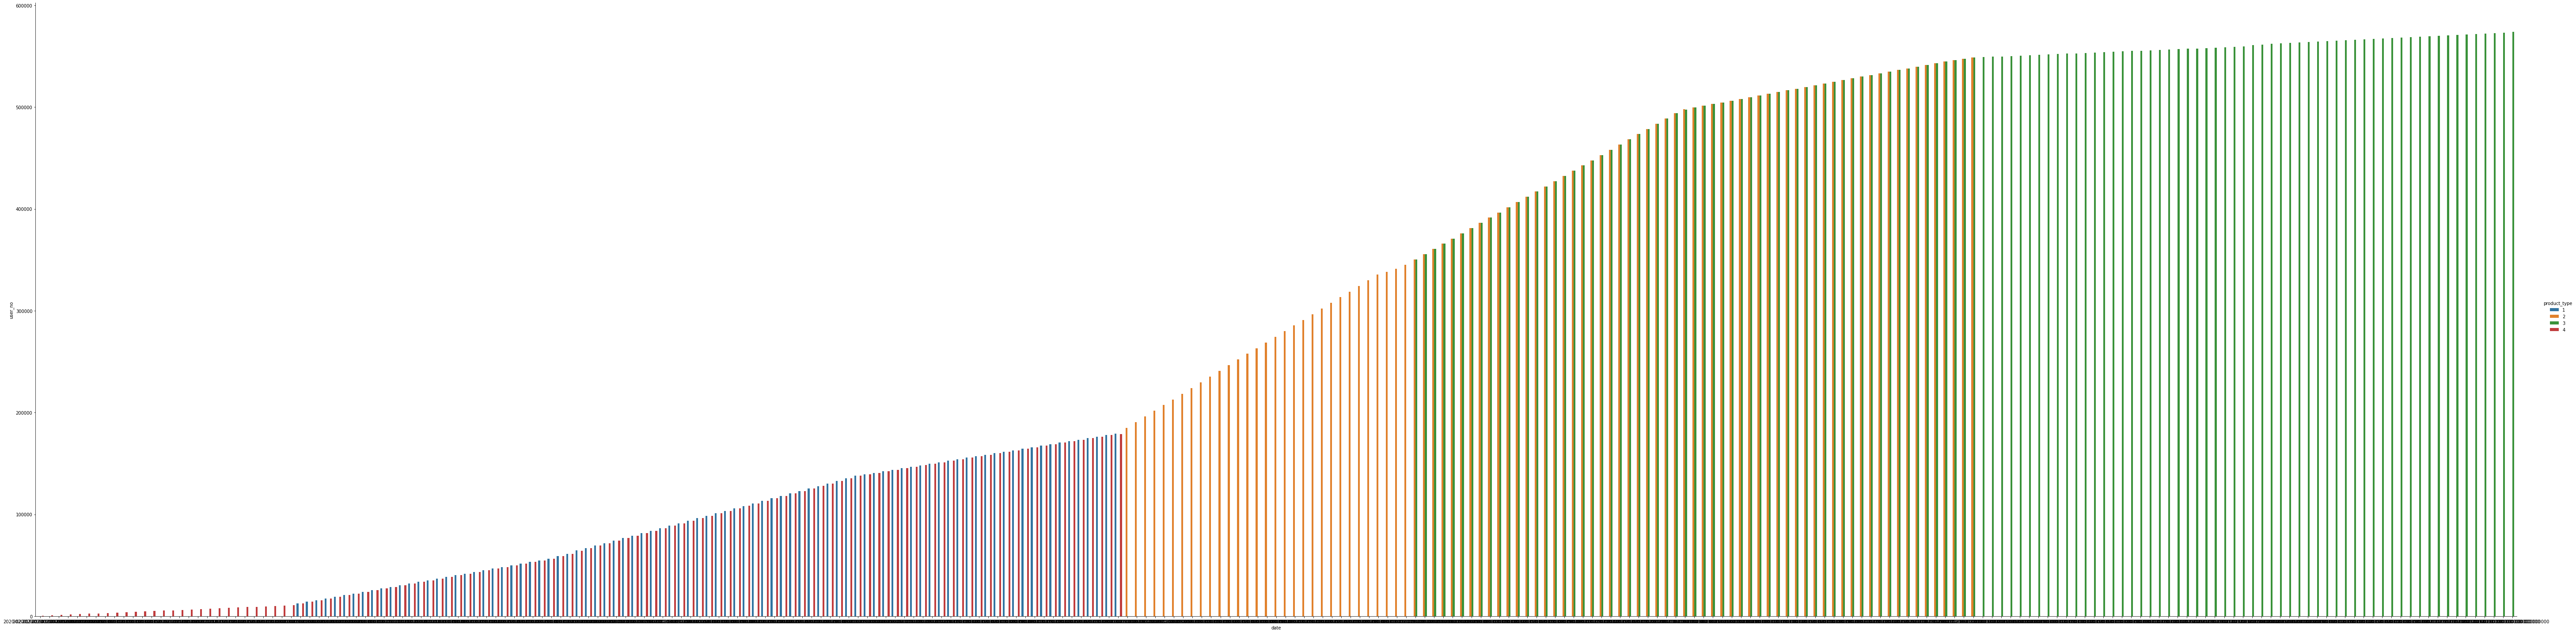

In [39]:
sns.catplot(x='date', y='user_no', data=dx,hue='product_type'
             ,kind='bar',height=20,aspect=4)

In [42]:
df1.groupby(['date','product_type']).max()

,,id,cost,c_group_type,user_no
date,product_type,,,,
2020-02-01,4,zwbslqhi307xi5jp,5.942134,2,373
2020-02-02,4,zxqda69wt511w57c,8.644409,2,774
2020-02-03,4,zyz29678pon8bo4w,4.102904,2,1139
2020-02-04,4,zymmvzr33yg74lqe,8.642820,2,1536
2020-02-05,4,zzvnx06im6poau20,8.617569,2,1914
...,...,...,...,...,...
2020-12-24,3,zykmpi0vfgcmz4ia,0.389340,2,571927
2020-12-25,3,zyxzappales5kci7,0.389286,2,572359
2020-12-26,3,zumpmauih7lt2q0d,0.389393,2,572817


In [44]:
sns.lineplot(x=df1.groupby(['date'], as_index = False).max().index, y='user_no', data=df1.groupby(['date','product_type']).max()
             ,hue='product_type',alpha=0.7,palette='viridis')
#Number of installed application representation over time

ValueError: Could not interpret input 'product_type'

In [ ]:
df1.groupby(['date','product_type']).max()

In [31]:
df1[ (df1['date']>'2020.05.28') & (df1['date']<'2020.08.01') ]
# it seems we dont have data for that time interval.

,id,date,cost,c_group_type,product_type,user_no


In [32]:
df2[df2['id']=='onttpqynastquqrk']
#Same user may have different transaction on different days (some of them are free of cost)

,id,group1_revenue,group2_revenue,transaction_date,product_type
1442852,onttpqynastquqrk,0.0,0.0,2020-09-04,2
1639430,onttpqynastquqrk,0.0,0.0,2020-09-16,2
1673817,onttpqynastquqrk,0.0,0.0,2020-09-18,2
1713278,onttpqynastquqrk,0.0,0.0,2020-09-21,2
1767467,onttpqynastquqrk,0.0,0.0,2020-09-24,2
1846097,onttpqynastquqrk,0.0,0.0,2020-09-29,2
2027653,onttpqynastquqrk,0.0,0.0,2020-10-16,2


In [33]:
df1[df1['id']=='onttpqynastquqrk']
#That same user only 1 row data when he/she install the product.

,id,date,cost,c_group_type,product_type,user_no
366705,onttpqynastquqrk,2020-09-05,0.0,2,2,366706


In [34]:
df3 = pd.merge(df2,df1.drop('product_type',axis=1),how='left',on='id')
df3

,id,group1_revenue,group2_revenue,transaction_date,product_type,date,cost,c_group_type,user_no
0,3hpenrzb1t9bgtnx,0.0,0.0,2020-02-01,4,2020-02-19,2.350469,1,6997
1,3a606dujm9xtc9bz,0.0,0.0,2020-02-01,4,2020-02-28,0.000000,1,10452
2,pz4pwaqzyhzmr5dg,0.0,0.0,2020-02-01,4,2020-02-07,0.000000,2,2583
3,n2kpnacoxccb9qr5,0.0,0.0,2020-02-01,4,2020-02-15,2.224955,1,5475
4,fjv76jfu84au9xuk,0.0,0.0,2020-02-01,4,2020-02-18,2.307774,1,6711
...,...,...,...,...,...,...,...,...,...
2279210,luegj24xnpj9p6p5,0.0,0.0,2020-12-28,3,2020-12-27,0.336981,1,573130
2279211,7znlkcgcjn0wx1ks,0.0,0.0,2020-12-28,3,2020-12-01,0.323289,1,561264
2279212,evv6hh7ug2do8nin,0.0,0.0,2020-12-28,3,2020-09-22,0.000000,2,457431
2279213,1trgw1ch1rmtvrfd,0.0,0.0,2020-12-28,3,2020-11-05,0.519969,1,550267


In [35]:
df3[df3['id']=='3hpenrzb1t9bgtnx']

,id,group1_revenue,group2_revenue,transaction_date,product_type,date,cost,c_group_type,user_no
0,3hpenrzb1t9bgtnx,0.0,0.000000,2020-02-01,4,2020-02-19,2.350469,1,6997
6996,3hpenrzb1t9bgtnx,0.0,0.000000,2020-02-09,4,2020-02-19,2.350469,1,6997
16761,3hpenrzb1t9bgtnx,0.0,0.000000,2020-02-20,4,2020-02-19,2.350469,1,6997
38856,3hpenrzb1t9bgtnx,0.0,0.000000,2020-03-03,4,2020-02-19,2.350469,1,6997
50962,3hpenrzb1t9bgtnx,0.0,0.000000,2020-03-05,4,2020-02-19,2.350469,1,6997
52275,3hpenrzb1t9bgtnx,0.0,0.000000,2020-03-05,4,2020-02-19,2.350469,1,6997
60777,3hpenrzb1t9bgtnx,0.0,0.000000,2020-03-06,4,2020-02-19,2.350469,1,6997
61598,3hpenrzb1t9bgtnx,0.0,0.000000,2020-03-06,4,2020-02-19,2.350469,1,6997
64925,3hpenrzb1t9bgtnx,0.0,0.000000,2020-03-07,4,2020-02-19,2.350469,1,6997
67461,3hpenrzb1t9bgtnx,0.0,0.000000,2020-03-07,4,2020-02-19,2.350469,1,6997


In [36]:
df2.groupby('transaction_date').count().sample(5)
#Random days, daily transcations sample

,id,group1_revenue,group2_revenue,product_type
transaction_date,,,,
2020-04-15,12282,12282,12282,12282
2020-09-09,16470,16470,16470,16470
2020-09-17,16122,16122,16122,16122
2020-08-28,15099,15099,15099,15099
2020-05-19,11209,11209,11209,11209


<AxesSubplot:xlabel='transaction_date', ylabel='id'>

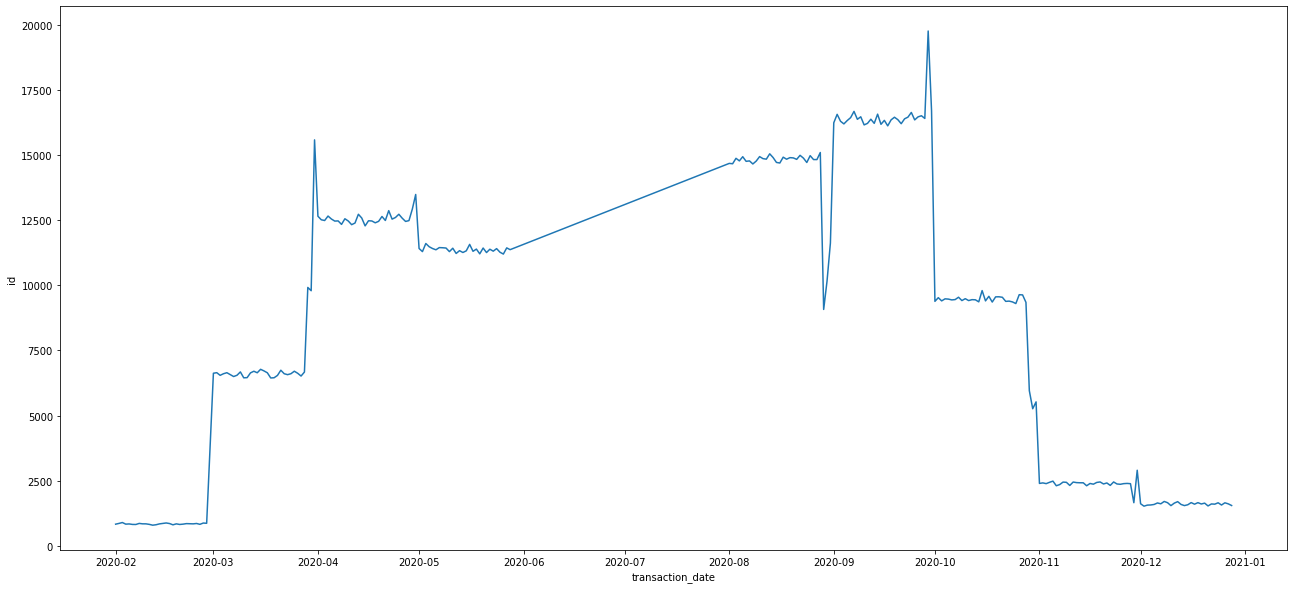

In [37]:
sns.lineplot(x='transaction_date', y='id', data=df2.groupby('transaction_date').count())
#Daily transaction counts

In [38]:
print(df1.groupby('product_type').sum()[['cost']])#producs cost to us and number of users
print(df1.groupby('product_type').count()[['cost']])#number of products 
print(df1.groupby('product_type').sum()[['cost']] / 
      df1.groupby('product_type').count()[['cost']])#unit price for installation

                       cost
product_type               
1             272614.756430
2              74095.083701
3              18313.733732
4             102492.189384
                cost
product_type        
1              78675
2             328075
3              66359
4             100650
                  cost
product_type          
1             3.465075
2             0.225848
3             0.275980
4             1.018303


In [39]:
print(df2.groupby('product_type').sum())#producs revenues
print(df2.groupby('product_type').count())#number of products 
print(df2.groupby('product_type').sum() 
      / df2.groupby('product_type').count())#unit based for installation
#it seems for "group2" we have revenue only at "product4" . 

              group1_revenue  group2_revenue
product_type                                
1              148582.514010        0.000000
2               68361.057425        0.000000
3               24616.426104        0.000000
4               45090.318523    26870.064408
                   id  group1_revenue  group2_revenue  transaction_date
product_type                                                           
1              412700          412700          412700            412700
2             1034315         1034315         1034315           1034315
3              305659          305659          305659            305659
4              526541          526541          526541            526541
              group1_revenue  group2_revenue  id  transaction_date
product_type                                                      
1                   0.360025        0.000000 NaN               NaN
2                   0.066093        0.000000 NaN               NaN
3                   0.080536  

In [41]:
income = df2.groupby('product_type').sum()
income['total_revenue'] = income['group1_revenue'] + income['group2_revenue'] 
out = df1.groupby('product_type').sum()[['cost']]

print(out)
print('*'*33)
print(income[['total_revenue']])

                       cost
product_type               
1             272614.756430
2              74095.083701
3              18313.733732
4             102492.189384
*********************************
              total_revenue
product_type               
1             148582.514010
2              68361.057425
3              24616.426104
4              71960.382931


In [42]:
summary = pd.merge(out,income[['total_revenue']],how='inner',on='product_type')
summary['current_status'] = summary['total_revenue'] - summary['cost']
summary
#what do you think ? Shall we go directly with product 3 ? 
#But if we consider cost is 1 time spend, but within time we may get more money on 
#other products. So lets look at Line graph product based approach.

,cost,total_revenue,current_status
product_type,,,
1,272614.756430,148582.514010,-124032.242419
2,74095.083701,68361.057425,-5734.026275
3,18313.733732,24616.426104,6302.692372
4,102492.189384,71960.382931,-30531.806453


In [43]:
def daily_cumsum(productid , df):
    prod_x = df1[df1['product_type']==productid]
    prod_x_daily = prod_x.groupby('date').sum()
    prod_x_daily_cumsum = prod_x_daily.cumsum()
    prod_x_daily_cumsum.reset_index(inplace=True)
    return prod_x_daily_cumsum
prod1 = daily_cumsum(1 , df1)
prod2 = daily_cumsum(2 , df1)
prod3 = daily_cumsum(3 , df1)
prod4 = daily_cumsum(4 , df1)

Product1 Total Cost by Time


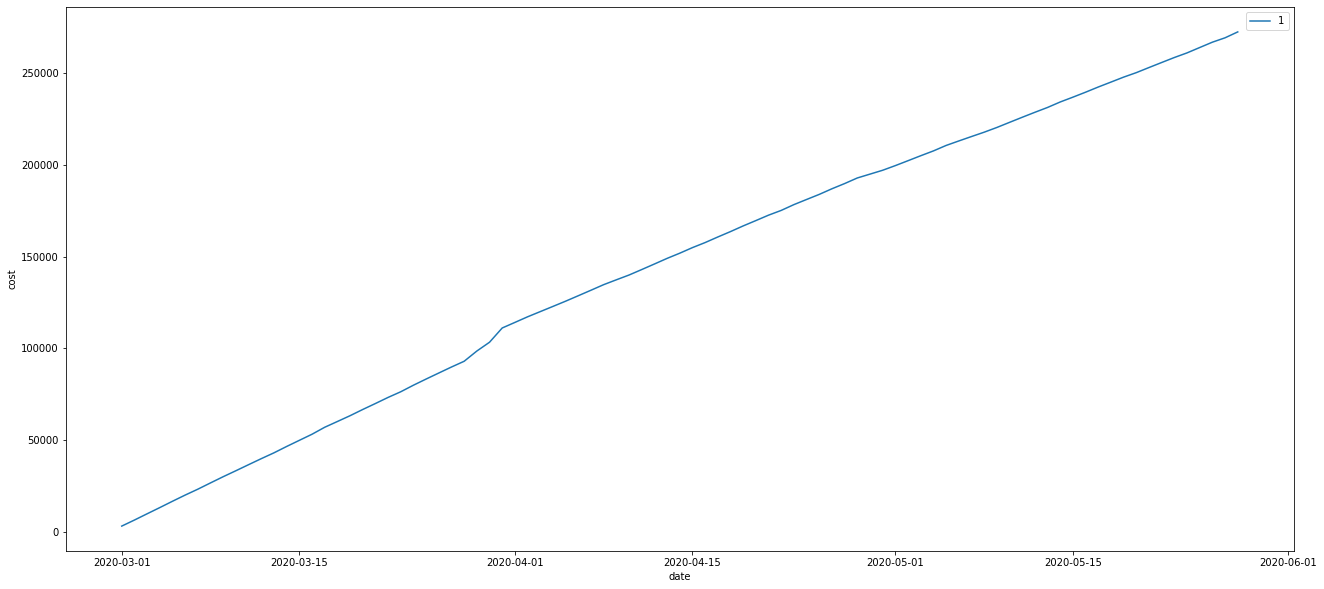

Product2 Total Cost by Time


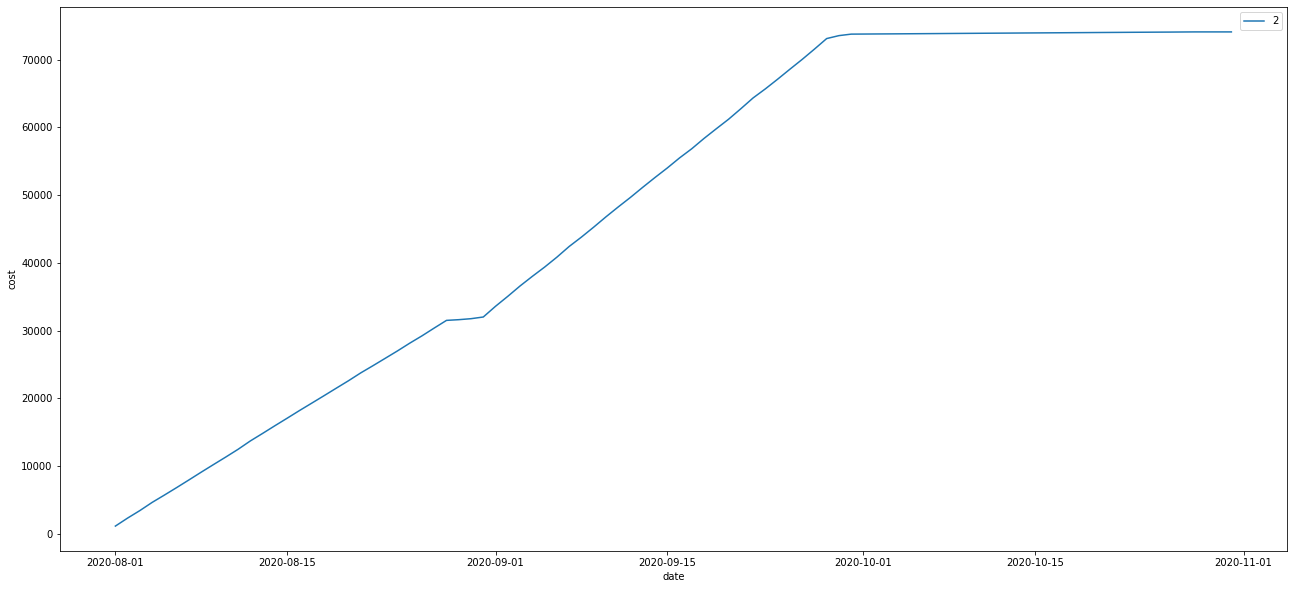

Product3 Total Cost by Time


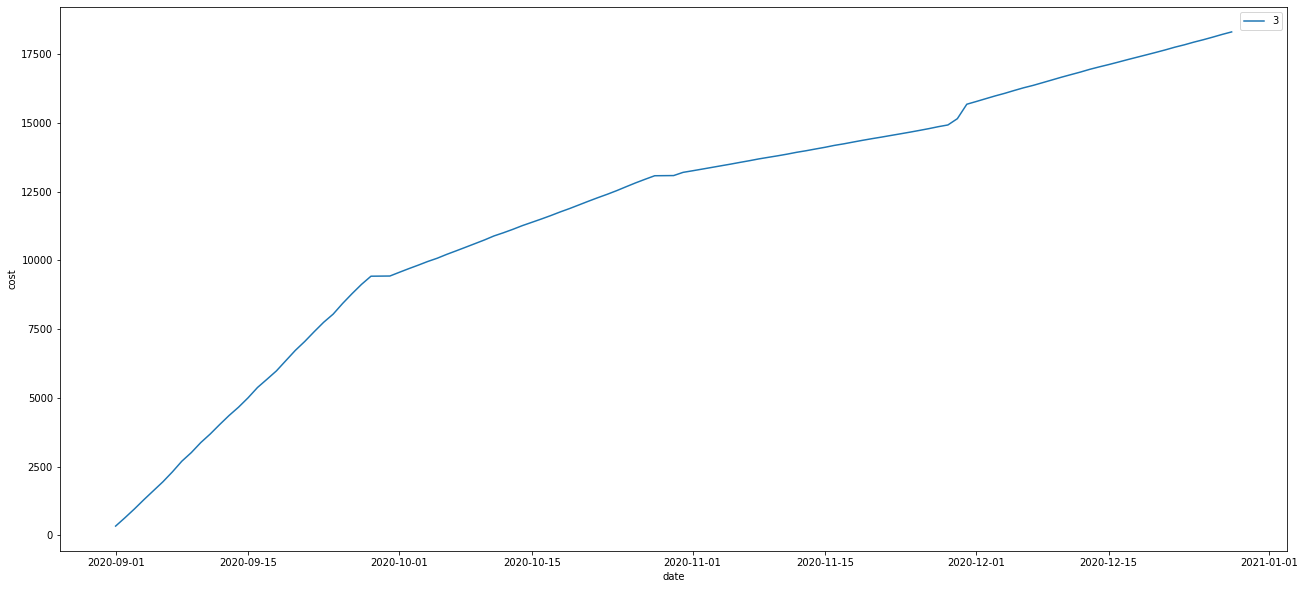

Product4 Total Cost by Time


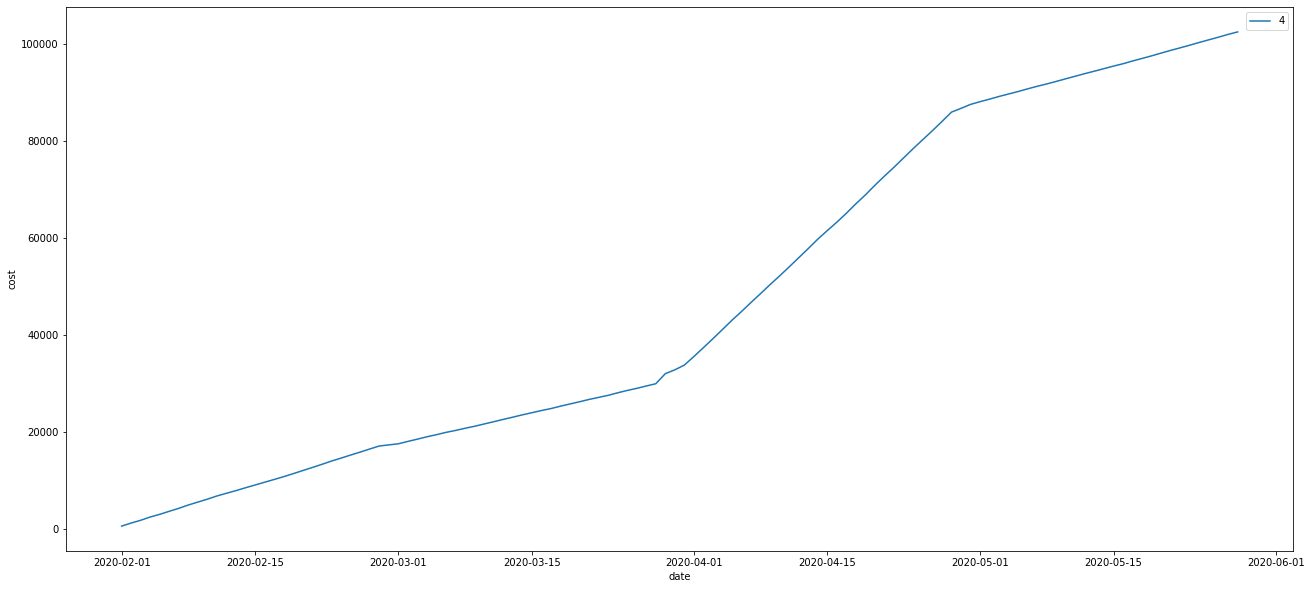

In [44]:
for i in range(1,5):
    print("Product" + str(i) + ' Total Cost by Time')
    sns.lineplot(x='date', y='cost', data=daily_cumsum(i , df1))
    #sns.lineplot(x='date', y='cost', data=daily_cumsum(i+1 , df1))
    plt.legend(str(i))
    plt.show()

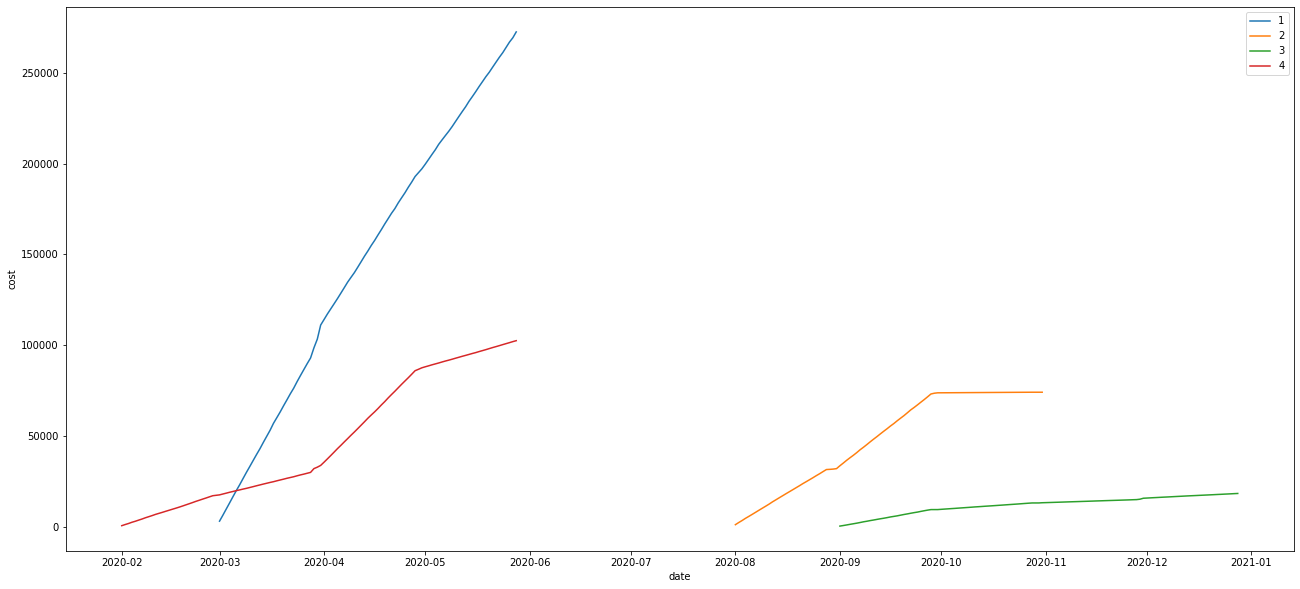

In [45]:
sns.lineplot(x='date', y='cost', data=daily_cumsum(1 , df1))
sns.lineplot(x='date', y='cost', data=daily_cumsum(2 , df1))
sns.lineplot(x='date', y='cost', data=daily_cumsum(3 , df1))
sns.lineplot(x='date', y='cost', data=daily_cumsum(4 , df1))
plt.legend(["1",'2','3','4'])

In [46]:
def revenue_cumsum(productid , df):
    prod_x = df2[df2['product_type']==productid]
    prod_x_daily = prod_x.groupby('transaction_date').sum()
    prod_x_daily_cumsum = prod_x_daily.cumsum()
    prod_x_daily_cumsum.reset_index(inplace=True)
    prod_x_daily_cumsum['total_revenue'] = prod_x_daily_cumsum['group1_revenue']+ prod_x_daily_cumsum['group2_revenue']
    return prod_x_daily_cumsum
prod11 = revenue_cumsum(1 , df2)
prod22 = revenue_cumsum(2 , df2)
prod33 = revenue_cumsum(3 , df2)
prod44 = revenue_cumsum(4 , df2)

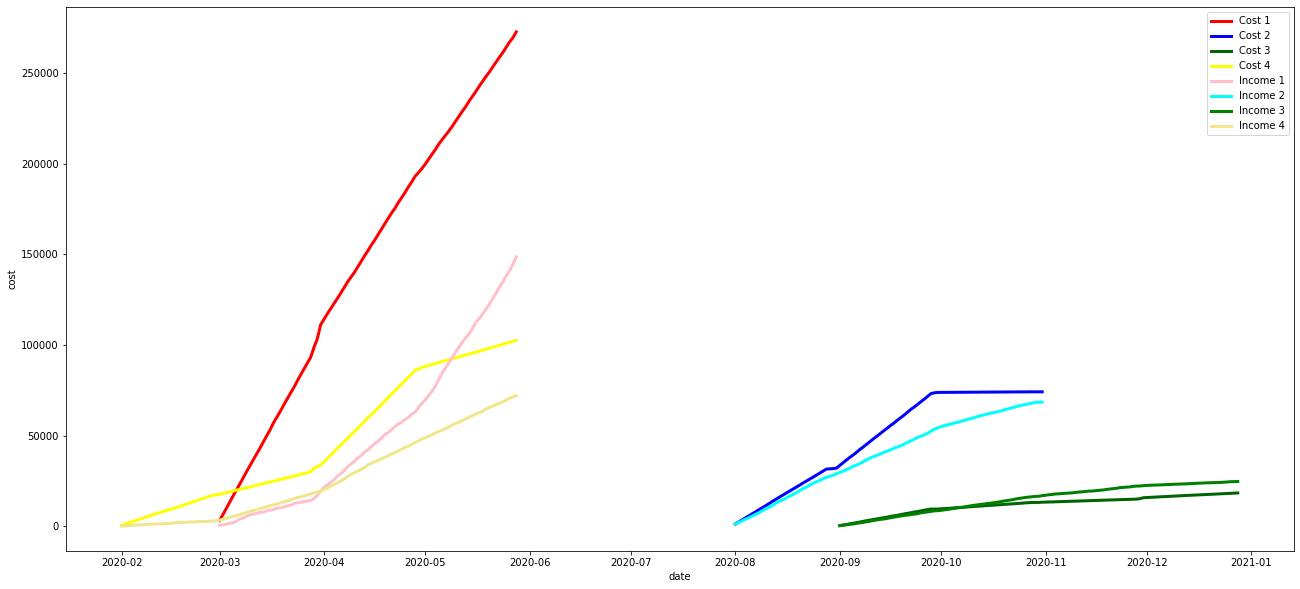

In [47]:
sns.lineplot(x='date', y='cost', data=daily_cumsum(1 , df1)
             ,linewidth = 3,color='red')
sns.lineplot(x='date', y='cost', data=daily_cumsum(2 , df1)
             ,linewidth = 3,color='blue')
sns.lineplot(x='date', y='cost', data=daily_cumsum(3 , df1)
             ,linewidth = 3,color='darkgreen')
sns.lineplot(x='date', y='cost', data=daily_cumsum(4 , df1)
             ,linewidth = 3,color='yellow')

sns.lineplot(x='transaction_date',y='total_revenue'
             ,data=revenue_cumsum(1,df2),linewidth = 3,color='pink')
sns.lineplot(x='transaction_date',y='total_revenue'
             ,data=revenue_cumsum(2,df2),linewidth = 3,color='cyan')
sns.lineplot(x='transaction_date',y='total_revenue'
             ,data=revenue_cumsum(3,df2),linewidth = 3,color='green')
sns.lineplot(x='transaction_date',y='total_revenue'
             ,data=revenue_cumsum(4,df2),linewidth = 3,color='khaki')

plt.legend(["Cost 1",'Cost 2','Cost 3','Cost 4',"Income 1",'Income 2','Income 3','Income 4'])
#we can quicklu summarize the cost and totalrevenue.

#with human eye i can estimate that Product2 and product4 
#will bring more money than 3 or 1 in time.

#Product 1 will most probably make "NO" profit at all. 
#Product 2 will most probably make profit in very SHORT TERM. 
#Product 3 can be stayed at playstore since its already in profit.
#Product 4 will most probably make profit in LONG TERM. 

# Lets try some forecasting with BILSTM ?

In [65]:
def build_income_df(df,product_id):
    temp = df.drop(['id'],axis=1)
    temp['income'] = temp['group1_revenue'] + temp['group2_revenue']
    temp = temp.drop(['group1_revenue', 'group2_revenue'],axis=1)
    temp.set_index('transaction_date',inplace=True)
    temp = temp[temp['product_type']==product_id]
    return temp
prod1_income = build_income_df(df2,1)
prod2_income = build_income_df(df2,2)
prod3_income = build_income_df(df2,3)
prod4_income = build_income_df(df2,4)
#we have built product based  income dataframes 

In [84]:
def build_cost_df(df,product_id):
    temp = df.drop(['id','c_group_type','user_no'],axis=1)
    temp.set_index('date',inplace=True)
    temp = temp[temp['product_type']==product_id]
    return temp
prod1_cost = build_cost_df(df1,1)
prod2_cost = build_cost_df(df1,2)
prod3_cost = build_cost_df(df1,3)
prod4_cost = build_cost_df(df1,4)
#we have built product based  cost dataframes

In [96]:
def sized_split(df,size):
    train_size = int(len(df) * size)
    test_size = len(df) - train_size
    train, test = df.iloc[:train_size], df.iloc[train_size:]
    return train, test

prod1_income_train, prod1_income_test = sized_split(prod1_income,0.9)
prod2_income_train, prod2_income_test = sized_split(prod2_income,0.9)
prod3_income_train, prod3_income_test = sized_split(prod3_income,0.9)
prod4_income_train, prod4_income_test = sized_split(prod4_income,0.9)

prod1_cost_train, prod1_cost_test = sized_split(prod1_cost,0.9)
prod2_cost_train, prod2_cost_test = sized_split(prod2_cost,0.9)
prod3_cost_train, prod3_cost_test = sized_split(prod3_cost,0.9)
prod4_cost_train, prod4_cost_test = sized_split(prod4_cost,0.9)

#We have splitted 4 products df with 90% with cost and income seperately.

In [105]:
def create_dataset(X, y, time_steps = 1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 7
#Costs
X_train_1_cost, y_train_1_cost = create_dataset(prod1_cost_train,prod1_cost_train.cost,time_steps)
X_test_1_cost, y_test_1_cost = create_dataset(prod1_cost_test,prod1_cost_test.cost, time_steps)

X_train_2_cost, y_train_2_cost = create_dataset(prod2_cost_train,prod2_cost_train.cost,time_steps)
X_test_2_cost, y_test_2_cost = create_dataset(prod2_cost_test,prod2_cost_test.cost, time_steps)

X_train_3_cost, y_train_3_cost = create_dataset(prod3_cost_train,prod3_cost_train.cost,time_steps)
X_test_3_cost, y_test_3_cost = create_dataset(prod3_cost_test,prod3_cost_test.cost, time_steps)

X_train_4_cost, y_train_4_cost = create_dataset(prod4_cost_train,prod4_cost_train.cost,time_steps)
X_test_4_cost, y_test_4_cost = create_dataset(prod4_cost_test,prod4_cost_test.cost, time_steps)

#Incomes
X_train_1_income, y_train_1_income = create_dataset(prod1_income_train,prod1_income_train.income,time_steps)
X_test_1_income, y_test_1_income = create_dataset(prod1_income_test,prod1_income_test.income, time_steps)

X_train_2_income, y_train_2_income = create_dataset(prod2_income_train,prod2_income_train.income,time_steps)
X_test_2_income, y_test_2_income = create_dataset(prod2_income_test,prod2_income_test.income, time_steps)

X_train_3_income, y_train_3_income = create_dataset(prod3_income_train,prod3_income_train.income,time_steps)
X_test_3_income, y_test_3_income = create_dataset(prod3_income_test,prod3_income_test.income, time_steps)

X_train_4_income, y_train_4_income = create_dataset(prod4_income_train,prod4_income_train.income,time_steps)
X_test_4_income, y_test_4_income = create_dataset(prod4_income_test,prod4_income_test.income, time_steps)


# 2

Epoch 1/10
8305/8305 [==============================] - 64s 7ms/step - loss: 0.2885 - accuracy: 0.5879 - val_loss: 0.6646 - val_accuracy: 0.5160
Epoch 2/10
8305/8305 [==============================] - 55s 7ms/step - loss: 0.2859 - accuracy: 0.5894 - val_loss: 0.6640 - val_accuracy: 0.5160
Epoch 3/10
8305/8305 [==============================] - 51s 6ms/step - loss: 0.2858 - accuracy: 0.5894 - val_loss: 0.6639 - val_accuracy: 0.5160
Epoch 4/10
8305/8305 [==============================] - 52s 6ms/step - loss: 0.2857 - accuracy: 0.5894 - val_loss: 0.6638 - val_accuracy: 0.5160
Epoch 5/10
8305/8305 [==============================] - 53s 6ms/step - loss: 0.2856 - accuracy: 0.5894 - val_loss: 0.6636 - val_accuracy: 0.5160
Epoch 6/10
8305/8305 [==============================] - 56s 7ms/step - loss: 0.2856 - accuracy: 0.5894 - val_loss: 0.6645 - val_accuracy: 0.5160
Epoch 7/10
8305/8305 [==============================] - 59s 7ms/step - loss: 0.2856 - accuracy: 0.5894 - val_loss: 0.6638 - val_ac

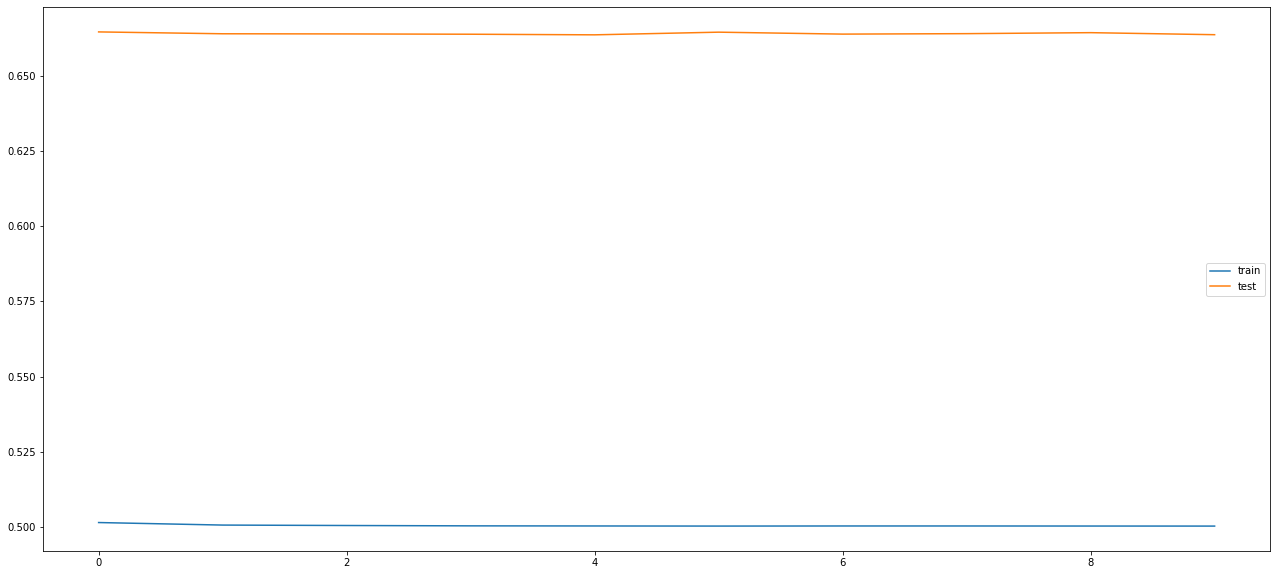

In [107]:
# 2
X_train = X_train_2_cost
y_train = y_train_2_cost


from tensorflow import keras
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=14,
            input_shape=(X_train.shape[1],X_train.shape[2])
)))
model.add(keras.layers.Dropout(rate=0.2)) # to prevent overfitting
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.1,
                   shuffle=False)
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()

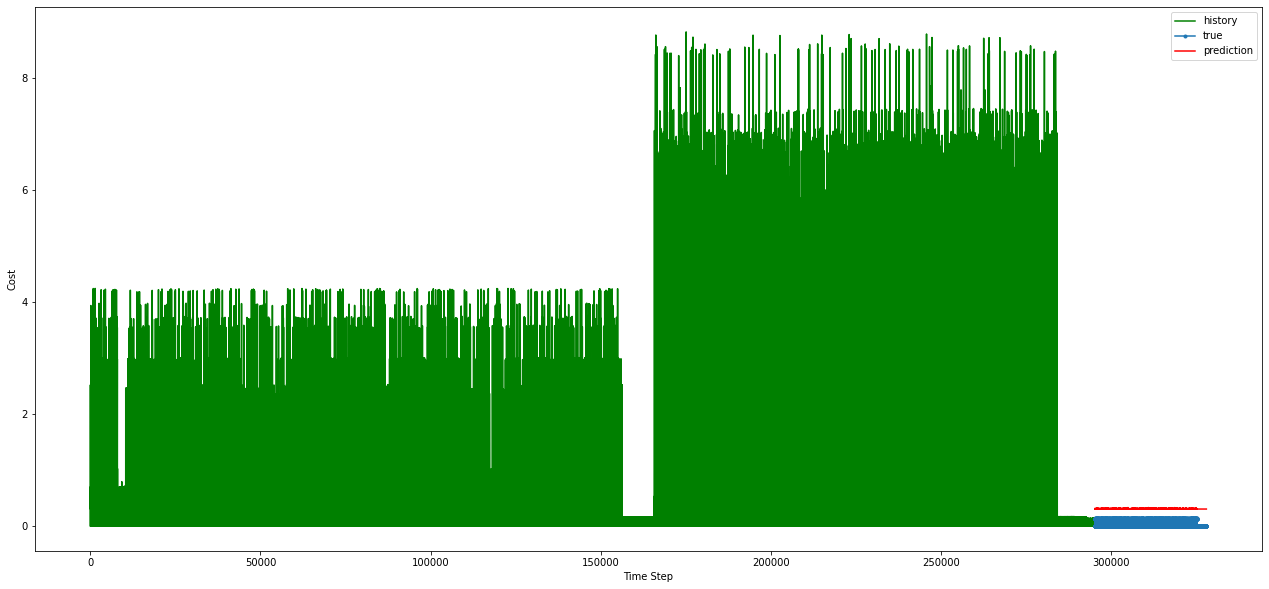

In [108]:
#2
X_test = X_test_2_cost
y_test = y_test_2_cost

y_pred = model.predict(X_test)
# y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1,-1))
# y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1,-1))
# y_pred_inv = cnt_transformer.inverse_transform(y_pred)
# print(y_train_inv)
# print(y_test_inv)
# print(y_pred_inv)
# plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label='history')
# plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_test_inv.flatten(),marker='.', label='true')
# plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_pred_inv.flatten(), 'r', label='prediction')

plt.plot(np.arange(0, len(y_train)), y_train.flatten(), 'g', label='history')
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_test.flatten(),marker='.', label='true')
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_pred.flatten(), 'r', label='prediction')
plt.ylabel('Cost')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [110]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
# y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(-1,1))
# y_pred_inv = cnt_transformer.inverse_transform(y_pred)
my_dict={"Actual":y_test.reshape(32801 ,), "Pred":y_pred.reshape(32801 ,)}
print(eval_metrics(y_test, y_pred))
compare=pd.DataFrame(my_dict)
compare

r2_score: -79.17966094505219 
 mae: 0.2972647228912799 
 mse: 0.0894697188330865 
 rmse: 0.29911489236259453
None


,Actual,Pred
0,0.0,0.304083
1,0.0,0.304083
2,0.0,0.304083
3,0.0,0.304083
4,0.0,0.304083
...,...,...
32796,0.0,0.304083
32797,0.0,0.304083
32798,0.0,0.304083
32799,0.0,0.304083


# 3 income prediction

Epoch 1/10
1935/1935 [==============================] - 25s 11ms/step - loss: 1.7938 - accuracy: 0.9868 - val_loss: 1.4103 - val_accuracy: 0.9925
Epoch 2/10
1935/1935 [==============================] - 16s 8ms/step - loss: 1.7572 - accuracy: 0.9883 - val_loss: 1.4103 - val_accuracy: 0.9925
Epoch 3/10
1935/1935 [==============================] - 16s 9ms/step - loss: 1.7567 - accuracy: 0.9883 - val_loss: 1.4105 - val_accuracy: 0.9925
Epoch 4/10
1935/1935 [==============================] - 15s 8ms/step - loss: 1.7564 - accuracy: 0.9883 - val_loss: 1.4108 - val_accuracy: 0.9925
Epoch 5/10
1935/1935 [==============================] - 14s 7ms/step - loss: 1.7562 - accuracy: 0.9883 - val_loss: 1.4109 - val_accuracy: 0.9925
Epoch 6/10
1935/1935 [==============================] - 15s 8ms/step - loss: 1.7562 - accuracy: 0.9883 - val_loss: 1.4110 - val_accuracy: 0.9925
Epoch 7/10
1935/1935 [==============================] - 14s 7ms/step - loss: 1.7563 - accuracy: 0.9883 - val_loss: 1.4110 - val_a

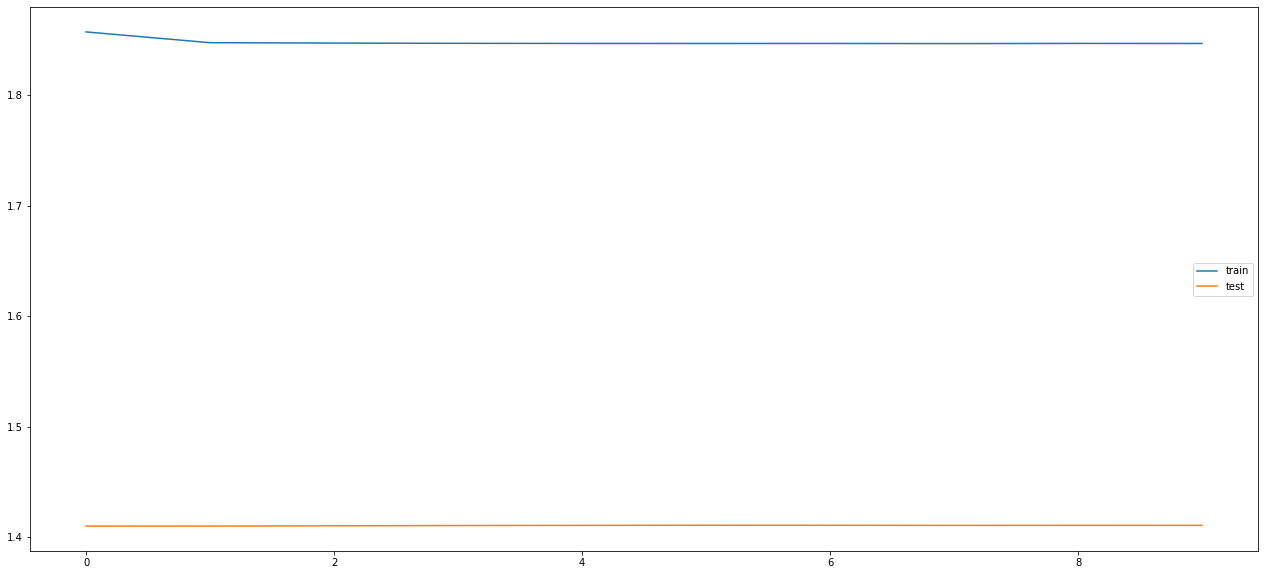

In [112]:
# 3
X_train = X_train_3_income
y_train = y_train_3_income


from tensorflow import keras
model = keras.Sequential()
model.add(
    keras.layers.Bidirectional(
        keras.layers.LSTM(
            units=14,
            input_shape=(X_train.shape[1],X_train.shape[2])
)))
model.add(keras.layers.Dropout(rate=0.2)) # to prevent overfitting
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.1,
                   shuffle=False)
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()

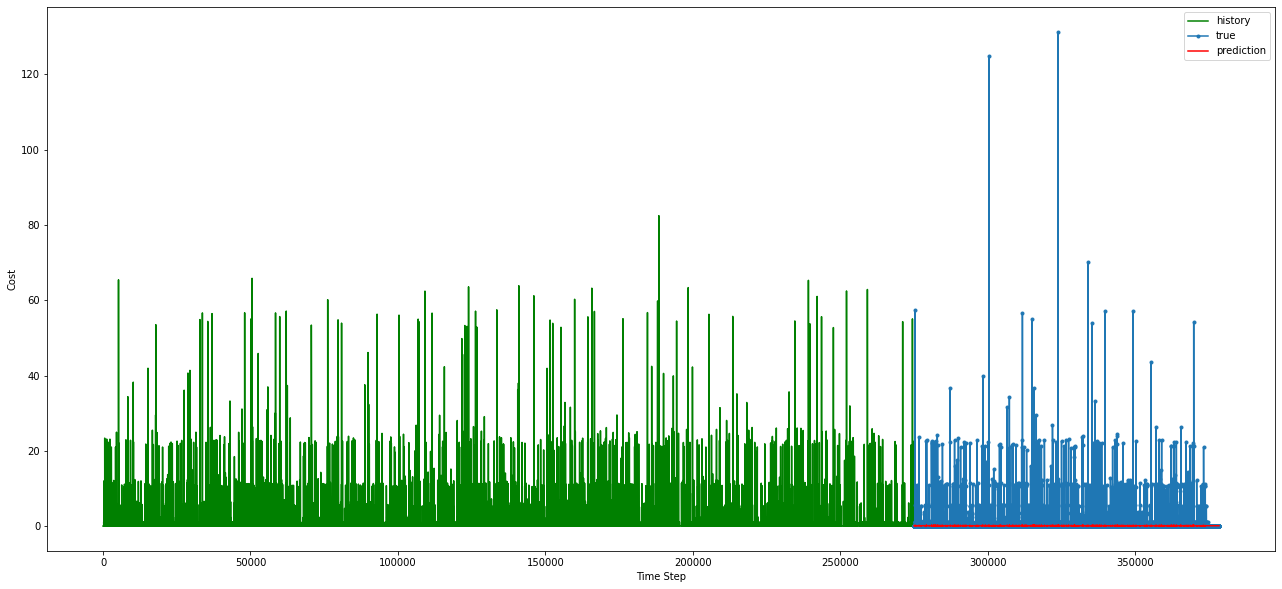

In [113]:
#3
X_test = X_test_2_income
y_test = y_test_2_income

y_pred = model.predict(X_test)
# y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1,-1))
# y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1,-1))
# y_pred_inv = cnt_transformer.inverse_transform(y_pred)
# print(y_train_inv)
# print(y_test_inv)
# print(y_pred_inv)
# plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label='history')
# plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_test_inv.flatten(),marker='.', label='true')
# plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_pred_inv.flatten(), 'r', label='prediction')

plt.plot(np.arange(0, len(y_train)), y_train.flatten(), 'g', label='history')
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_test.flatten(),marker='.', label='true')
plt.plot(np.arange(len(y_train), len(y_train)+ len(y_test)), y_pred.flatten(), 'r', label='prediction')
plt.ylabel('Cost')
plt.xlabel('Time Step')
plt.legend()
plt.show();

In [115]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
# y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(-1,1))
# y_pred_inv = cnt_transformer.inverse_transform(y_pred)
my_dict={"Actual":y_test.reshape(103425 ,), "Pred":y_pred.reshape(103425 ,)}
print(eval_metrics(y_test, y_pred))
compare=pd.DataFrame(my_dict)
compare

r2_score: -0.00031319167194965303 
 mae: 0.15808874848033555 
 mse: 1.408482175688399 
 rmse: 1.1867949172828467
None


,Actual,Pred
0,0.0,0.091757
1,0.0,0.091757
2,0.0,0.091757
3,0.0,0.091757
4,0.0,0.091757
...,...,...
103420,0.0,0.091757
103421,0.0,0.091757
103422,0.0,0.091757
103423,0.0,0.091757


In [116]:
# model couldnt correlate anything to build a algorithm to predict. We need more features...